In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import json
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from joblib import dump, load
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer
from scipy.stats import pearsonr
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, max_error, explained_variance_score

In [2]:
data = pd.read_csv('feetsZTFandAPOGEE.csv')
display(data)

,oid,filtercode,source_id_01_x,apogee_id_01_x,FEETS_ra,FEETS_dec,FEETS_Amplitude,FEETS_AndersonDarling,FEETS_Autocor_length,FEETS_Beyond1Std,...,GAIAEDR3_PHOT_RP_MEAN_MAG,GAIAEDR3_R_MED_GEO,GAIAEDR3_R_LO_GEO,GAIAEDR3_R_HI_GEO,GAIAEDR3_R_MED_PHOTOGEO,GAIAEDR3_R_LO_PHOTOGEO,GAIAEDR3_R_HI_PHOTOGEO,APOGEE_FE_H,APOGEE_FE_H_ERR,APOGEE_FE_H_FLAG
0,245113200002473,zg,2364561950954447872,2M00135100-2055372,3.462713,-20.926921,0.084504,0.885343,2.0,0.285024,...,13.2033,339.67538,337.28570,342.69803,339.43900,337.17358,342.77347,-0.161730,0.013648,0
1,245113200002686,zg,2364556247237856256,2M00131008-2058054,3.292288,-20.968287,0.068747,1.000000,1.0,0.101449,...,14.0735,295.23508,292.65470,297.42520,295.36190,292.47882,298.53436,-0.076917,0.011298,0
2,245113200002901,zg,2364555899344878976,2M00131027-2100087,3.292733,-21.002473,0.068613,1.000000,1.0,0.144231,...,13.3797,340.71540,325.15480,368.62686,333.32245,316.79538,350.01495,-0.227580,0.011440,0
3,245113200002972,zg,2364555280869588480,2M00133364-2100524,3.390128,-21.014581,0.068843,1.000000,1.0,0.163462,...,12.4275,170.18893,169.71016,170.66193,170.24036,169.78642,170.81667,-0.120960,0.012339,0
4,245114100000600,zg,2364732203458207360,2M00085954-2038355,2.248187,-20.643443,0.099483,1.000000,1.0,0.111111,...,14.7157,295.60330,291.74728,299.22214,296.27444,291.86102,302.36694,-0.255940,0.013686,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59172,1795116400002164,zg,1608320292912053120,2M14154780+5351450,213.949116,53.862705,0.035544,1.000000,1.0,0.091346,...,13.6469,169.56201,169.03460,170.10419,169.41536,168.92456,169.96484,-0.138960,0.011083,0
59173,1795116400003508,zg,1608294385669318912,2M14144682+5340576,213.694862,53.682651,0.029783,1.000000,1.0,0.217391,...,13.2998,225.06349,224.21277,225.85630,225.28221,224.37021,226.21147,-0.086607,0.011024,0
59174,1795116400004249,zg,1608264080380119808,2M14172437+5337015,214.351687,53.617110,0.022659,1.000000,1.0,0.211538,...,13.9793,493.21707,452.54745,536.97830,471.73440,437.41315,506.21692,-0.439820,0.016354,0
59175,1795116400013559,zg,1608239307008739968,2M14153620+5321458,213.900858,53.362662,0.031648,0.999998,1.0,0.250000,...,11.0823,2437.09810,2364.41380,2519.58500,2444.65190,2364.09130,2537.68240,-0.404300,0.008769,0


In [3]:
counter = 0
for col in data.columns:
    print(f"[{counter}] {col}")
    counter = counter + 1

[0] oid
[1] filtercode
[2] source_id_01_x
[3] apogee_id_01_x
[4] FEETS_ra
[5] FEETS_dec
[6] FEETS_Amplitude
[7] FEETS_AndersonDarling
[8] FEETS_Autocor_length
[9] FEETS_Beyond1Std
[10] FEETS_CAR_mean
[11] FEETS_CAR_sigma
[12] FEETS_CAR_tau
[13] FEETS_Con
[14] FEETS_Eta_e
[15] FEETS_FluxPercentileRatioMid20
[16] FEETS_FluxPercentileRatioMid35
[17] FEETS_FluxPercentileRatioMid50
[18] FEETS_FluxPercentileRatioMid65
[19] FEETS_FluxPercentileRatioMid80
[20] FEETS_Freq1_harmonics_amplitude_0
[21] FEETS_Freq1_harmonics_amplitude_1
[22] FEETS_Freq1_harmonics_amplitude_2
[23] FEETS_Freq1_harmonics_amplitude_3
[24] FEETS_Freq1_harmonics_rel_phase_0
[25] FEETS_Freq1_harmonics_rel_phase_1
[26] FEETS_Freq1_harmonics_rel_phase_2
[27] FEETS_Freq1_harmonics_rel_phase_3
[28] FEETS_Freq2_harmonics_amplitude_0
[29] FEETS_Freq2_harmonics_amplitude_1
[30] FEETS_Freq2_harmonics_amplitude_2
[31] FEETS_Freq2_harmonics_amplitude_3
[32] FEETS_Freq2_harmonics_rel_phase_0
[33] FEETS_Freq2_harmonics_rel_phase_1
[3

In [4]:
# Meta columns to exclude

hr2 = 0
n = 0



print (f"top of {n}")
meta_columns = ['oid', 'filtercode', 'source_id_01', 'apogee_id_01']

# Columns to use for training (excluding GAIA and most APOGEE data)
training_columns = [col for col in data.columns if (col.startswith('FEETS_') or col in(['APOGEE_TEFF', 'APOGEE_FE_H','APOGEE_RV_TEFF', 'APOGEE_RV_FEH','APOGEE_TEFF_SPEC','APOGEE_FE'])) and (col not in ['FEETS_ra', 'FEETS_dec','ZTF_dist_x','ra','RA','dec','DEC','id','ID'] and col not in meta_columns)]

top of 0


In [5]:
display(training_columns)
display(data[training_columns])

['FEETS_Amplitude',
 'FEETS_AndersonDarling',
 'FEETS_Autocor_length',
 'FEETS_Beyond1Std',
 'FEETS_CAR_mean',
 'FEETS_CAR_sigma',
 'FEETS_CAR_tau',
 'FEETS_Con',
 'FEETS_Eta_e',
 'FEETS_FluxPercentileRatioMid20',
 'FEETS_FluxPercentileRatioMid35',
 'FEETS_FluxPercentileRatioMid50',
 'FEETS_FluxPercentileRatioMid65',
 'FEETS_FluxPercentileRatioMid80',
 'FEETS_Freq1_harmonics_amplitude_0',
 'FEETS_Freq1_harmonics_amplitude_1',
 'FEETS_Freq1_harmonics_amplitude_2',
 'FEETS_Freq1_harmonics_amplitude_3',
 'FEETS_Freq1_harmonics_rel_phase_0',
 'FEETS_Freq1_harmonics_rel_phase_1',
 'FEETS_Freq1_harmonics_rel_phase_2',
 'FEETS_Freq1_harmonics_rel_phase_3',
 'FEETS_Freq2_harmonics_amplitude_0',
 'FEETS_Freq2_harmonics_amplitude_1',
 'FEETS_Freq2_harmonics_amplitude_2',
 'FEETS_Freq2_harmonics_amplitude_3',
 'FEETS_Freq2_harmonics_rel_phase_0',
 'FEETS_Freq2_harmonics_rel_phase_1',
 'FEETS_Freq2_harmonics_rel_phase_2',
 'FEETS_Freq2_harmonics_rel_phase_3',
 'FEETS_Freq3_harmonics_amplitude_0',


,FEETS_Amplitude,FEETS_AndersonDarling,FEETS_Autocor_length,FEETS_Beyond1Std,FEETS_CAR_mean,FEETS_CAR_sigma,FEETS_CAR_tau,FEETS_Con,FEETS_Eta_e,FEETS_FluxPercentileRatioMid20,...,FEETS_StetsonK,FEETS_StetsonK_AC,FEETS_StructureFunction_index_21,FEETS_StructureFunction_index_31,FEETS_StructureFunction_index_32,APOGEE_TEFF_SPEC,APOGEE_TEFF,APOGEE_RV_TEFF,APOGEE_RV_FEH,APOGEE_FE_H
0,0.084504,0.885343,2.0,0.285024,21.051425,0.000000,0.704687,0.000000,9.011373e+05,0.170056,...,0.768038,0.766427,1.504427,1.539554,1.089450,4233.0,4337.1420,4550.0410,-0.388760,-0.161730
1,0.068747,1.000000,1.0,0.101449,25.487167,0.000000,0.635156,0.000000,9.084593e+05,0.124755,...,0.549056,0.578672,1.724148,1.919312,1.239982,4097.7,4195.6025,4186.6465,0.044326,-0.076917
2,0.068613,1.000000,1.0,0.144231,23.989169,0.000000,0.631055,0.000000,2.063617e+06,0.102556,...,0.614862,0.641417,1.860023,2.508402,1.442210,4375.1,4483.3604,4619.5050,-0.120413,-0.227580
3,0.068843,1.000000,1.0,0.163462,22.532562,0.000000,0.636426,0.000000,1.550269e+06,0.119294,...,0.650798,0.651082,1.648119,1.904480,1.280051,4177.8,4278.4910,4437.3610,0.013733,-0.120960
4,0.099483,1.000000,1.0,0.111111,8.877708,0.064796,1.918569,0.000000,1.501376e+06,0.118403,...,0.580866,0.685695,1.800886,2.513992,1.427883,3866.9,3979.0557,3980.8440,-0.474670,-0.255940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59172,0.035544,1.000000,1.0,0.091346,0.848332,0.022626,18.958132,0.000000,1.177141e+08,0.140607,...,0.529916,0.464383,2.330054,4.005592,1.904618,3778.9,3881.5676,3986.5737,-0.448073,-0.138960
59173,0.029783,1.000000,1.0,0.217391,26.815359,0.000000,0.575781,0.009756,1.879283e+08,0.134476,...,0.674022,0.465678,1.811650,2.591591,1.682719,3981.6,4080.9058,4230.7240,-0.051527,-0.086607
59174,0.022659,1.000000,1.0,0.211538,21.997974,0.000000,0.704687,0.000000,1.490325e+08,0.136804,...,0.652056,0.477518,1.707862,2.487199,1.885156,4363.2,4487.0005,4709.6445,-0.384647,-0.439820
59175,0.031648,0.999998,1.0,0.250000,19.680455,0.000000,0.648437,0.000000,2.120814e+08,0.139374,...,0.728502,0.455596,1.247175,1.144079,1.153268,4172.9,4292.6960,4326.7266,-0.561278,-0.404300


In [6]:
counter = 0

feetsFocusedCols= training_columns
LOGG = ["APOGEE_LOGG"]
display(LOGG)
feetsFocusedCols += LOGG

display(feetsFocusedCols)
feetsFocusedData = data[feetsFocusedCols]
for col in feetsFocusedData.columns:
    print(f"[{counter}] {col}")
    counter = counter + 1

['APOGEE_LOGG']

['FEETS_Amplitude',
 'FEETS_AndersonDarling',
 'FEETS_Autocor_length',
 'FEETS_Beyond1Std',
 'FEETS_CAR_mean',
 'FEETS_CAR_sigma',
 'FEETS_CAR_tau',
 'FEETS_Con',
 'FEETS_Eta_e',
 'FEETS_FluxPercentileRatioMid20',
 'FEETS_FluxPercentileRatioMid35',
 'FEETS_FluxPercentileRatioMid50',
 'FEETS_FluxPercentileRatioMid65',
 'FEETS_FluxPercentileRatioMid80',
 'FEETS_Freq1_harmonics_amplitude_0',
 'FEETS_Freq1_harmonics_amplitude_1',
 'FEETS_Freq1_harmonics_amplitude_2',
 'FEETS_Freq1_harmonics_amplitude_3',
 'FEETS_Freq1_harmonics_rel_phase_0',
 'FEETS_Freq1_harmonics_rel_phase_1',
 'FEETS_Freq1_harmonics_rel_phase_2',
 'FEETS_Freq1_harmonics_rel_phase_3',
 'FEETS_Freq2_harmonics_amplitude_0',
 'FEETS_Freq2_harmonics_amplitude_1',
 'FEETS_Freq2_harmonics_amplitude_2',
 'FEETS_Freq2_harmonics_amplitude_3',
 'FEETS_Freq2_harmonics_rel_phase_0',
 'FEETS_Freq2_harmonics_rel_phase_1',
 'FEETS_Freq2_harmonics_rel_phase_2',
 'FEETS_Freq2_harmonics_rel_phase_3',
 'FEETS_Freq3_harmonics_amplitude_0',


[0] FEETS_Amplitude
[1] FEETS_AndersonDarling
[2] FEETS_Autocor_length
[3] FEETS_Beyond1Std
[4] FEETS_CAR_mean
[5] FEETS_CAR_sigma
[6] FEETS_CAR_tau
[7] FEETS_Con
[8] FEETS_Eta_e
[9] FEETS_FluxPercentileRatioMid20
[10] FEETS_FluxPercentileRatioMid35
[11] FEETS_FluxPercentileRatioMid50
[12] FEETS_FluxPercentileRatioMid65
[13] FEETS_FluxPercentileRatioMid80
[14] FEETS_Freq1_harmonics_amplitude_0
[15] FEETS_Freq1_harmonics_amplitude_1
[16] FEETS_Freq1_harmonics_amplitude_2
[17] FEETS_Freq1_harmonics_amplitude_3
[18] FEETS_Freq1_harmonics_rel_phase_0
[19] FEETS_Freq1_harmonics_rel_phase_1
[20] FEETS_Freq1_harmonics_rel_phase_2
[21] FEETS_Freq1_harmonics_rel_phase_3
[22] FEETS_Freq2_harmonics_amplitude_0
[23] FEETS_Freq2_harmonics_amplitude_1
[24] FEETS_Freq2_harmonics_amplitude_2
[25] FEETS_Freq2_harmonics_amplitude_3
[26] FEETS_Freq2_harmonics_rel_phase_0
[27] FEETS_Freq2_harmonics_rel_phase_1
[28] FEETS_Freq2_harmonics_rel_phase_2
[29] FEETS_Freq2_harmonics_rel_phase_3
[30] FEETS_Freq3_h

In [19]:
# remove FEETS_Freq*_harmonics_rel_phase_0

feetsFocusedDataClean = feetsFocusedData.drop(['FEETS_Freq1_harmonics_rel_phase_0','FEETS_Freq2_harmonics_rel_phase_0','FEETS_Freq3_harmonics_rel_phase_0'], axis=1)
for col in feetsFocusedDataClean.columns:
    print(f"[{counter}] {col}")
    counter = counter + 1

[135] FEETS_Amplitude
[136] FEETS_AndersonDarling
[137] FEETS_Autocor_length
[138] FEETS_Beyond1Std
[139] FEETS_CAR_mean
[140] FEETS_CAR_sigma
[141] FEETS_CAR_tau
[142] FEETS_Con
[143] FEETS_Eta_e
[144] FEETS_FluxPercentileRatioMid20
[145] FEETS_FluxPercentileRatioMid35
[146] FEETS_FluxPercentileRatioMid50
[147] FEETS_FluxPercentileRatioMid65
[148] FEETS_FluxPercentileRatioMid80
[149] FEETS_Freq1_harmonics_amplitude_0
[150] FEETS_Freq1_harmonics_amplitude_1
[151] FEETS_Freq1_harmonics_amplitude_2
[152] FEETS_Freq1_harmonics_amplitude_3
[153] FEETS_Freq1_harmonics_rel_phase_1
[154] FEETS_Freq1_harmonics_rel_phase_2
[155] FEETS_Freq1_harmonics_rel_phase_3
[156] FEETS_Freq2_harmonics_amplitude_0
[157] FEETS_Freq2_harmonics_amplitude_1
[158] FEETS_Freq2_harmonics_amplitude_2
[159] FEETS_Freq2_harmonics_amplitude_3
[160] FEETS_Freq2_harmonics_rel_phase_1
[161] FEETS_Freq2_harmonics_rel_phase_2
[162] FEETS_Freq2_harmonics_rel_phase_3
[163] FEETS_Freq3_harmonics_amplitude_0
[164] FEETS_Freq3_

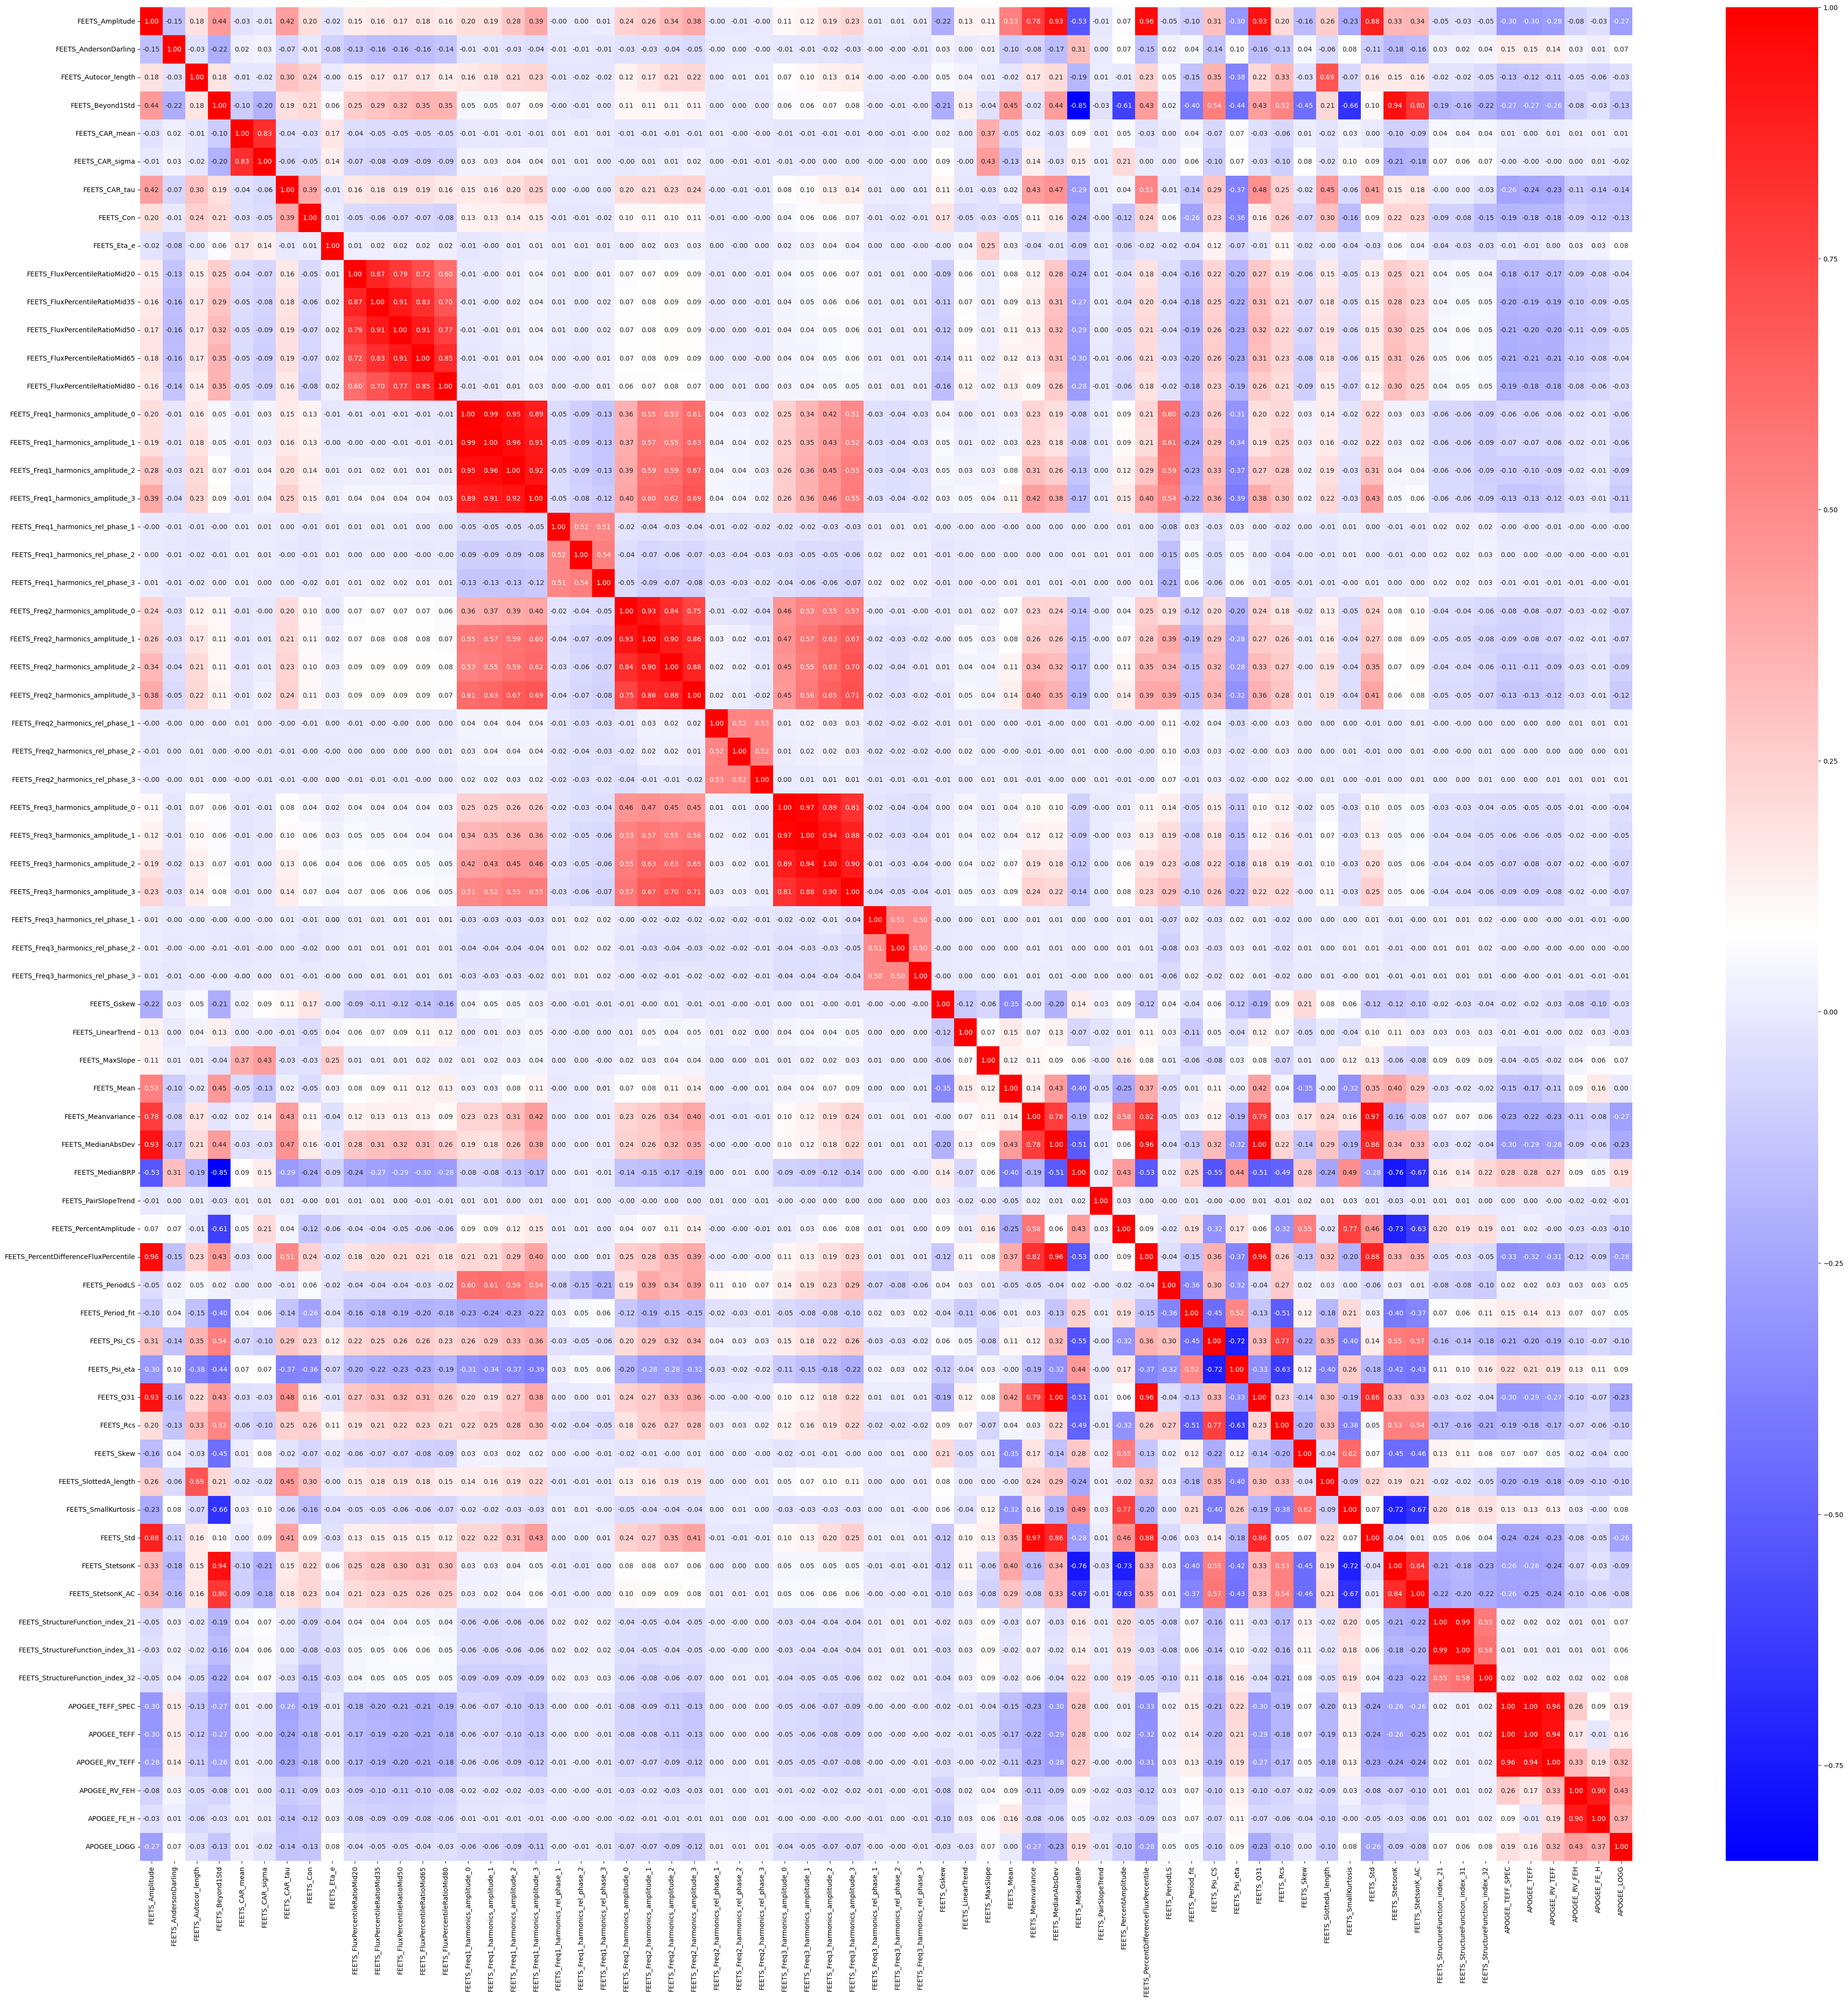

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# # Summary statistics
# print(data.describe())

# Correlation matrix
plt.figure(figsize=(50, 50))
sns.heatmap(feetsFocusedDataClean.corr(), annot=True, fmt=".2f",cmap = 'bwr')
plt.show()

In [9]:
# Initialize lists to store correlation coefficients and p-values
correlations = []
p_values = []

# Calculate correlation and p-value for each feature
for col in feetsFocusedDataClean.columns:
    corr, p_val = pearsonr(data[col], data['APOGEE_LOGG'])
    correlations.append(corr)
    p_values.append(p_val)

# Create a DataFrame to hold the results
correlation_df = pd.DataFrame({
    'Feature': feetsFocusedDataClean.columns,
    'Correlation': correlations,
    'P-Value': p_values})

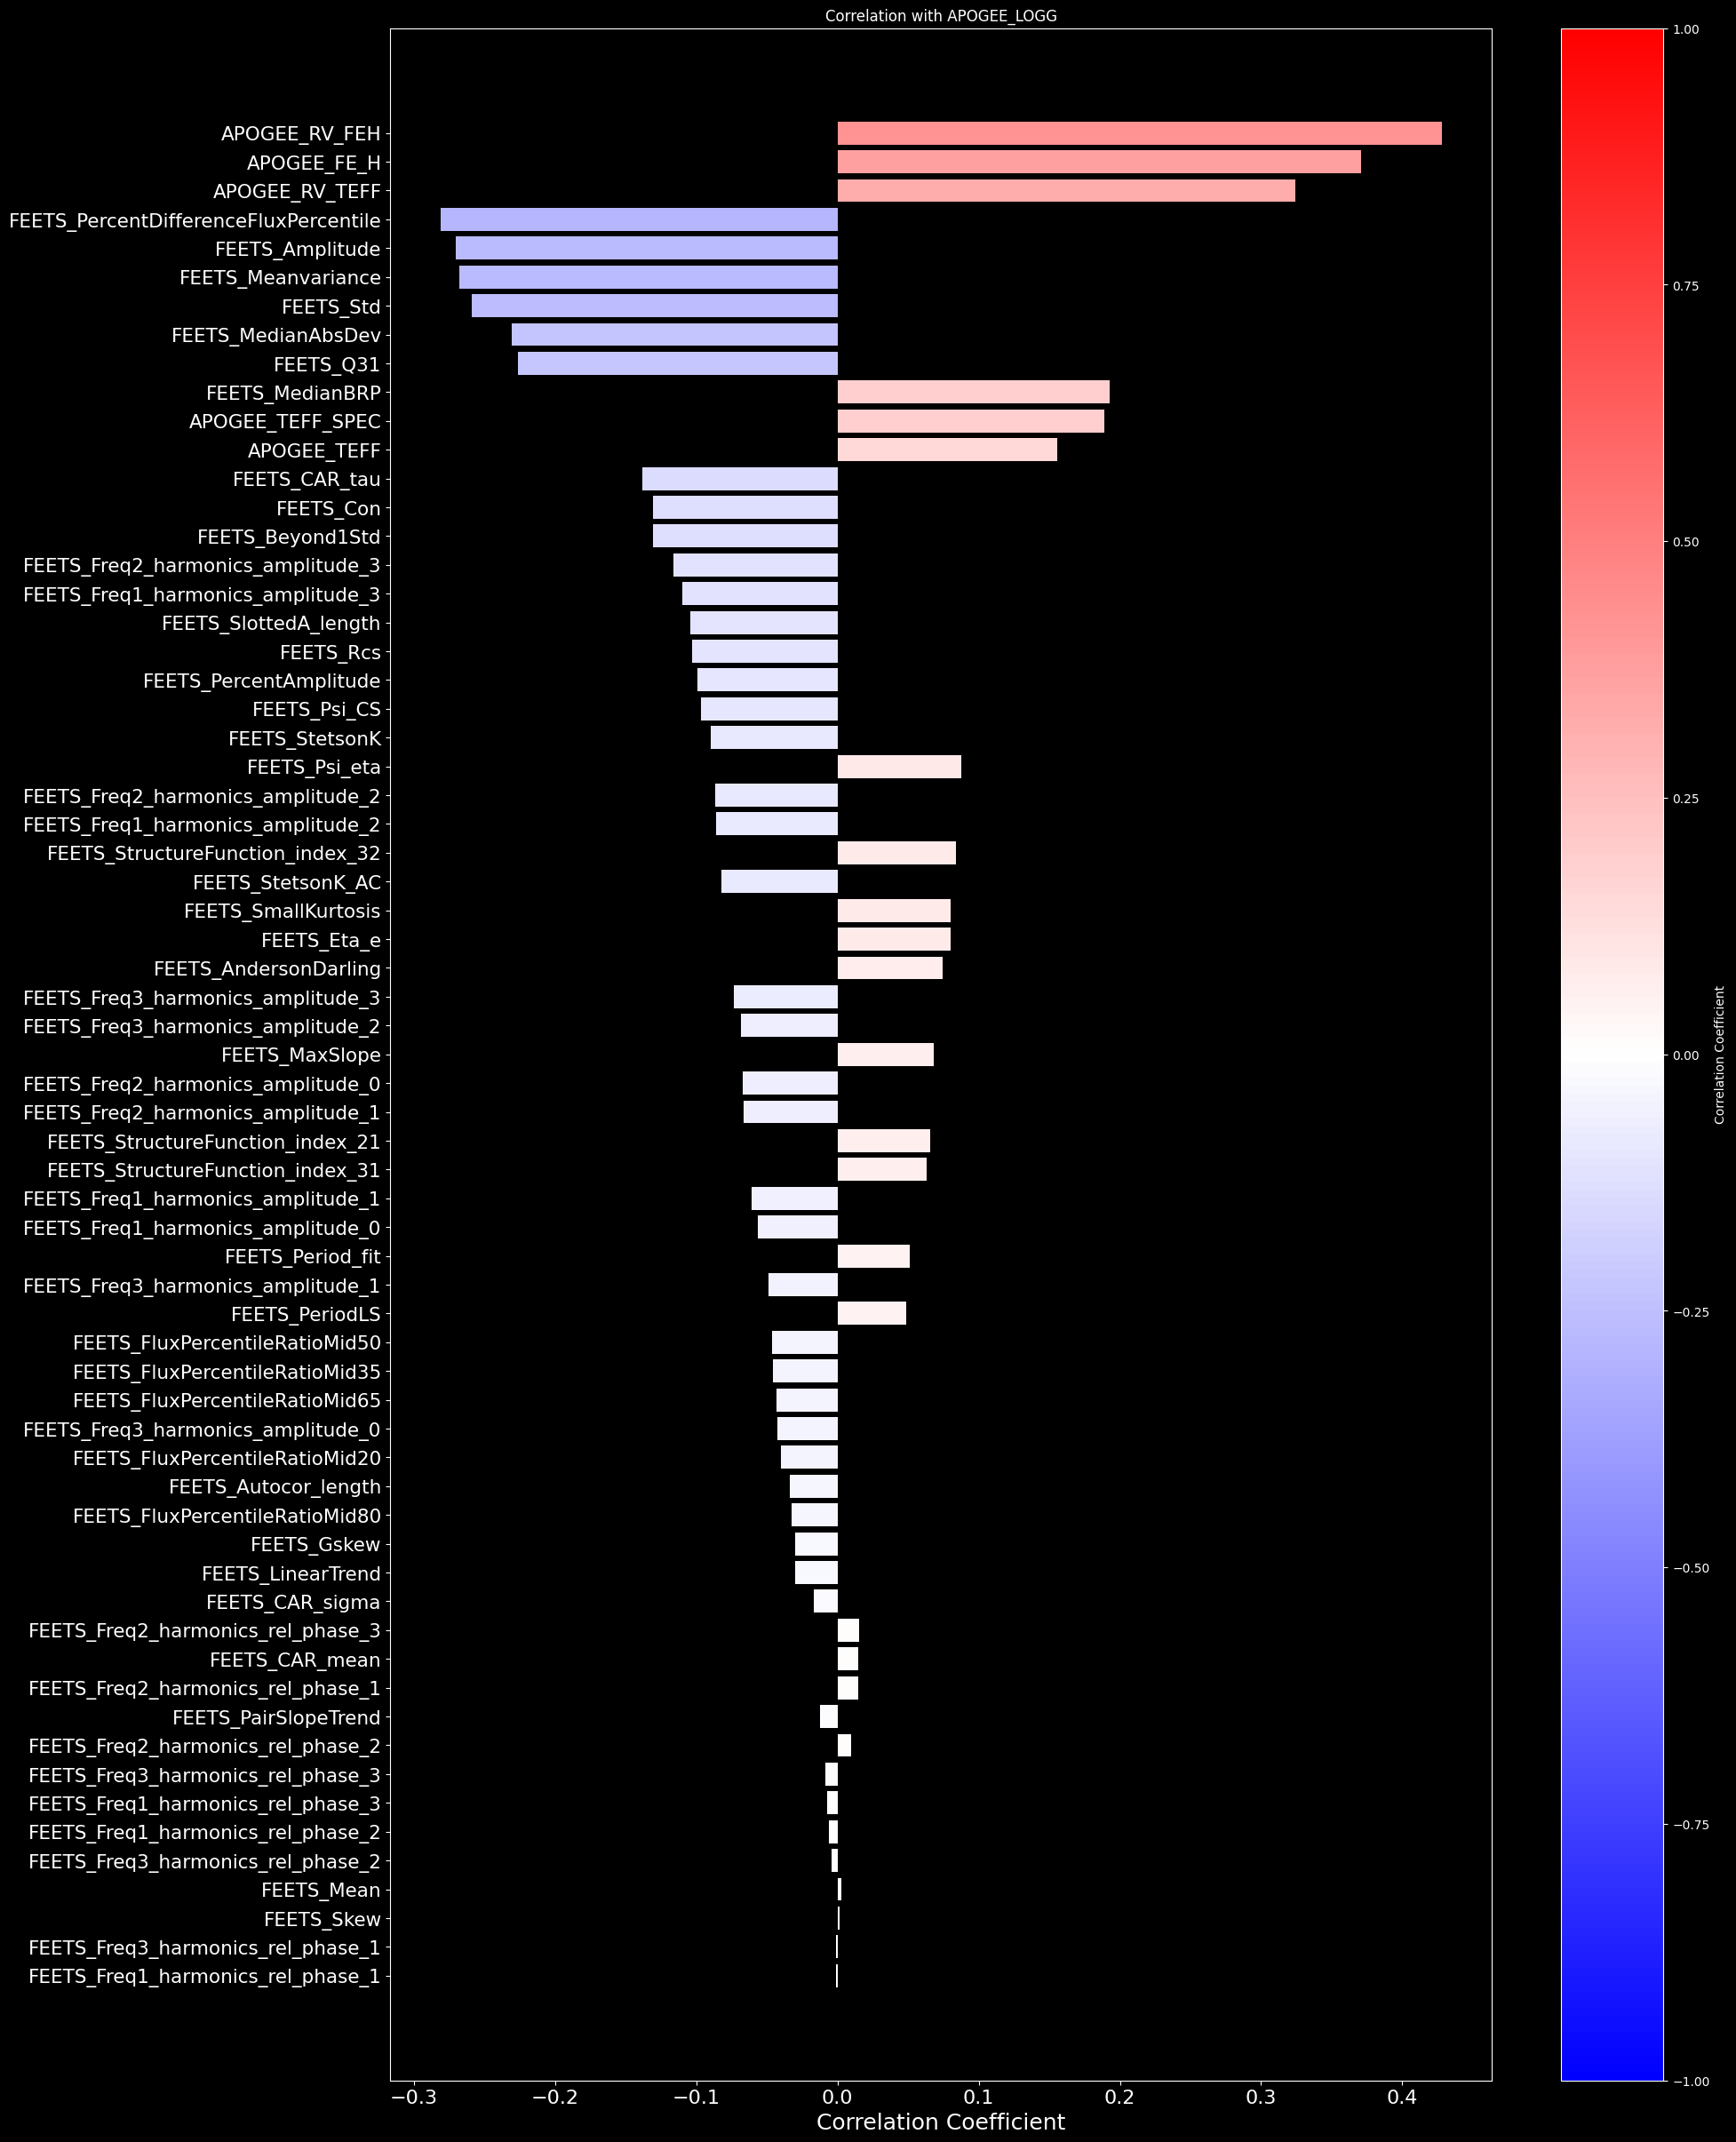

In [18]:
plt.style.use('dark_background')
# Exclude the row with 'APOGEE_LOGG'
correlation_df = correlation_df[correlation_df['Feature'] != 'APOGEE_LOGG']
correlation_df = correlation_df.sort_values(by='Correlation', key=abs, ascending=False)
# Define the colormap normalization from -1 to 1
norm = plt.Normalize(vmin=-1, vmax=1)
colors = plt.cm.bwr(norm(correlation_df['Correlation']))

# Plot correlation coefficients
plt.figure(figsize=(20, 30))
bars = plt.barh(correlation_df['Feature'], correlation_df['Correlation'], color=colors)
plt.xlabel('Correlation Coefficient', fontsize=18)  # Adjust label text size here
plt.title('Correlation with APOGEE_LOGG', fontsize=12)  # Adjust title text size here
plt.xticks(fontsize=16)  # Adjust x-axis tick size here
plt.yticks(fontsize=15.5)  # Adjust y-axis tick size here
plt.gca().invert_yaxis()


# Add colorbar
sm = plt.cm.ScalarMappable(cmap='bwr', norm=norm)
sm.set_array([])  # Only needed for adding colorbar without mappable
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('Correlation Coefficient')

plt.show()

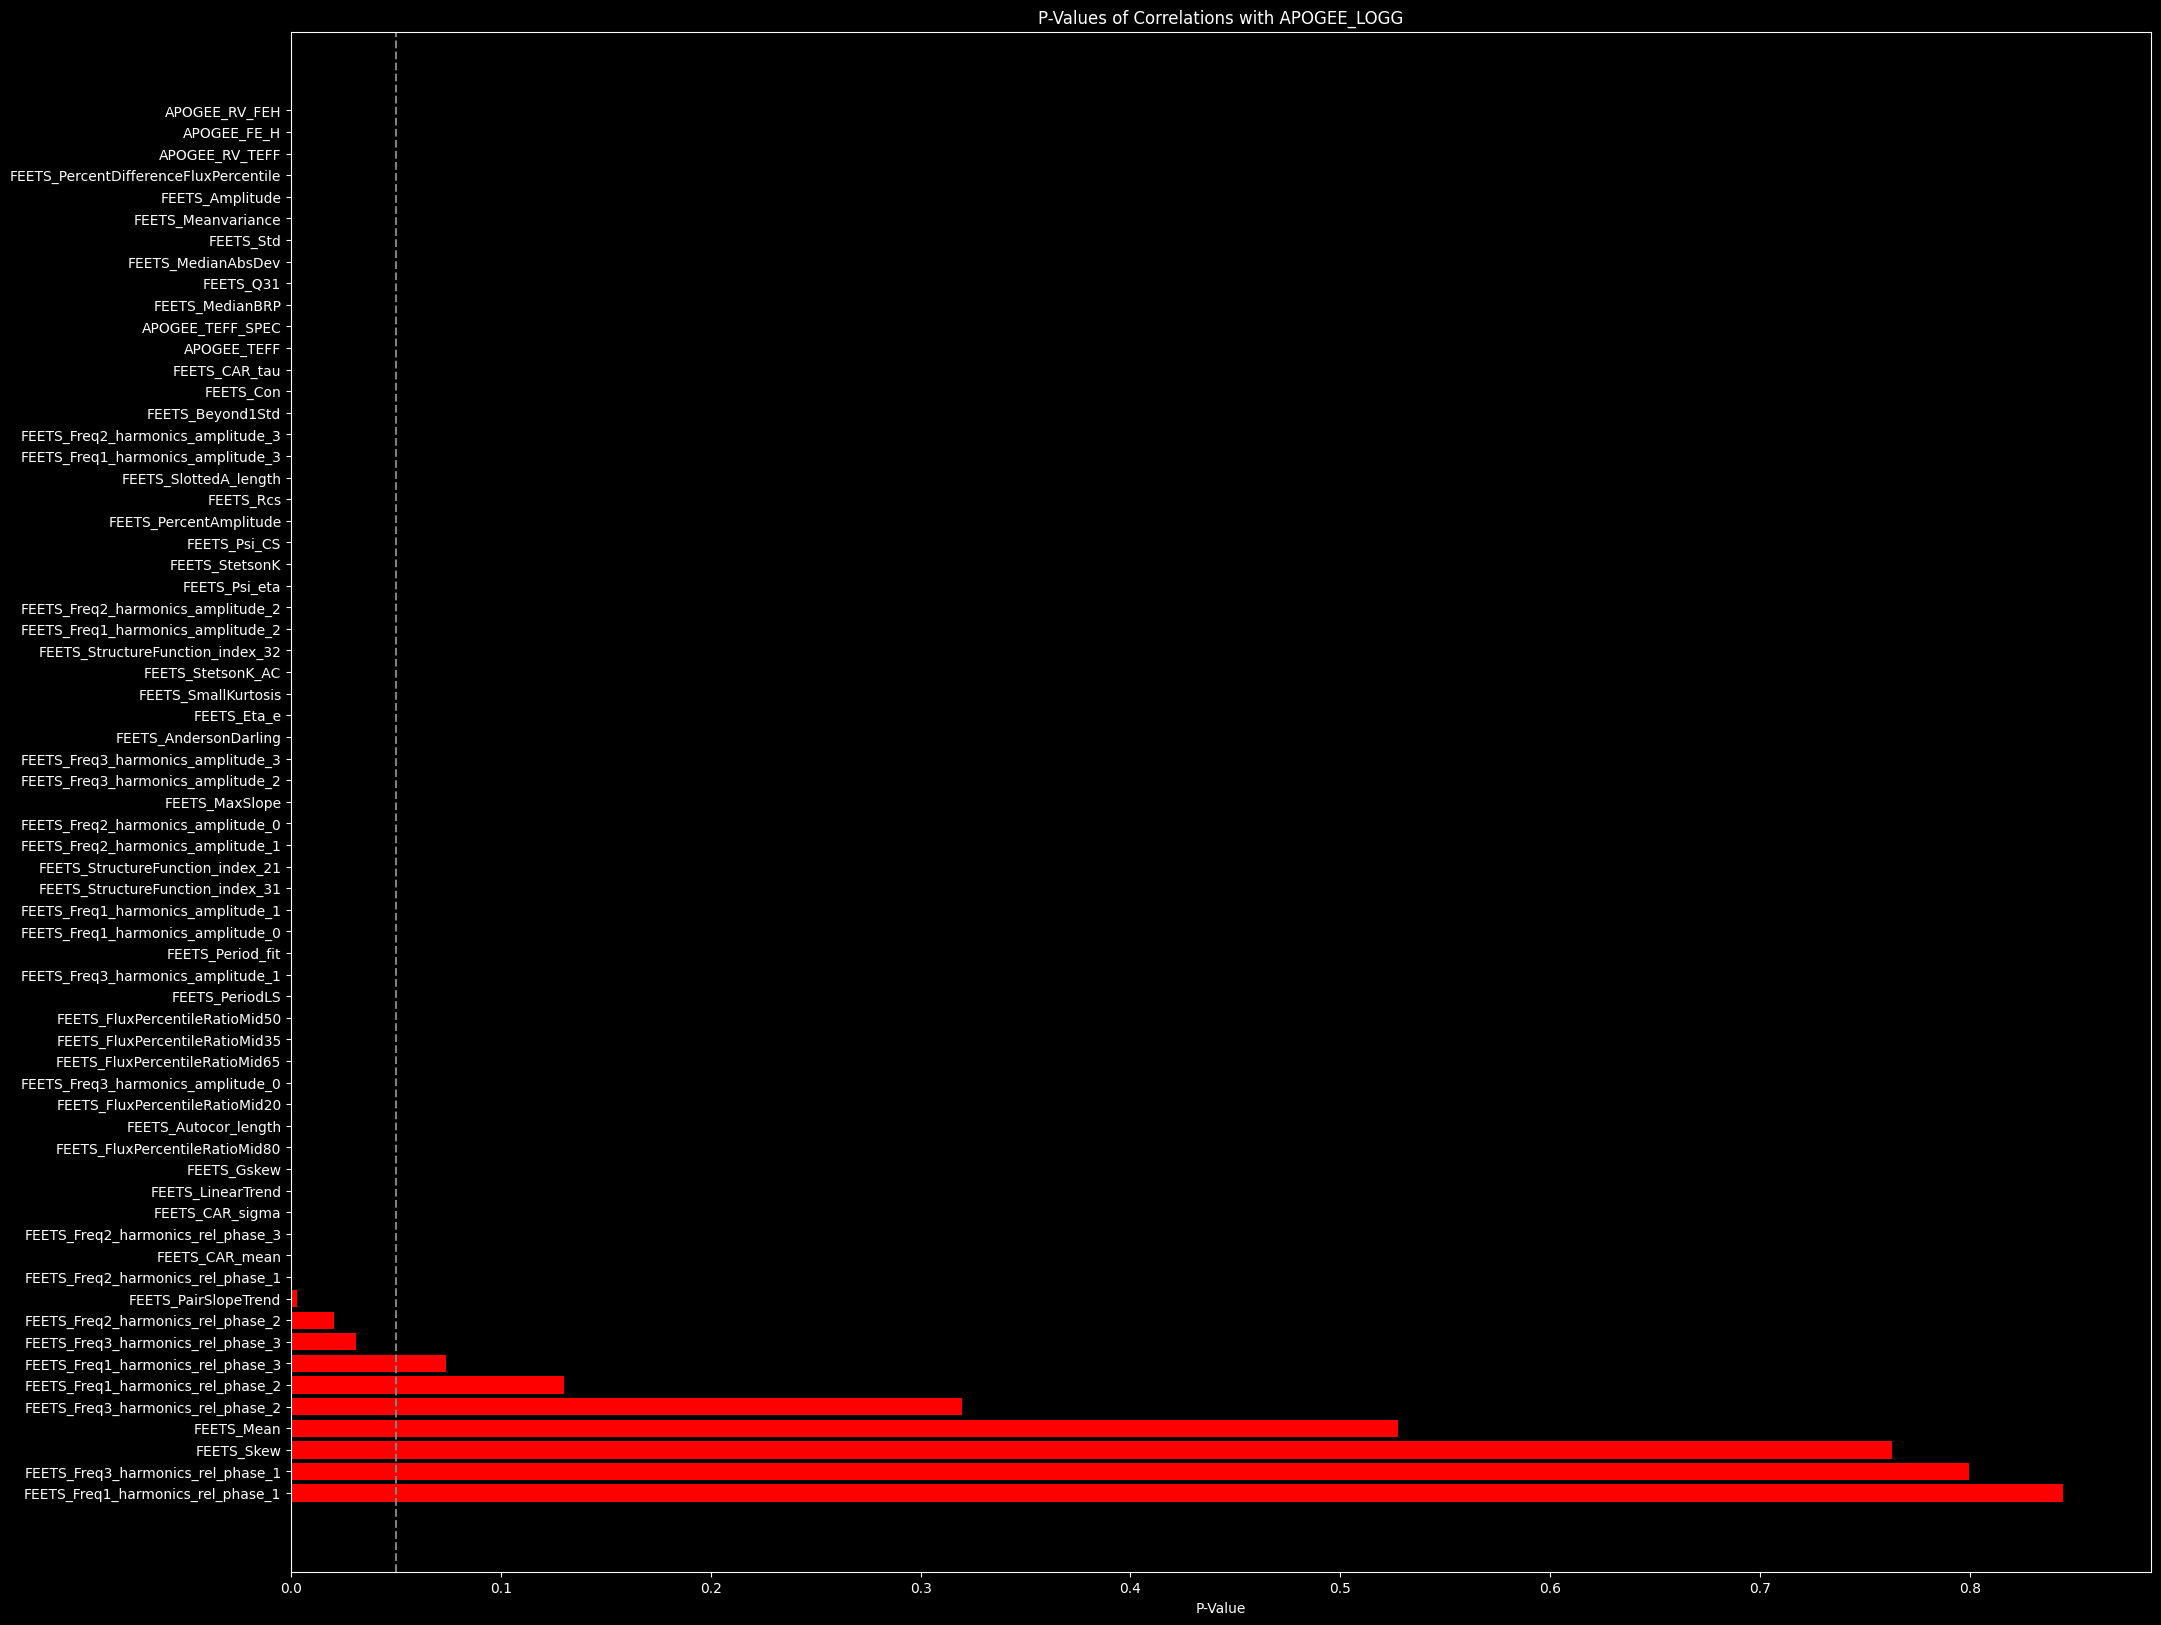

In [11]:
# Plot p-values
plt.figure(figsize=(24, 20))
plt.barh(correlation_df['Feature'], correlation_df['P-Value'], color='r')
plt.axvline(x=0.05, color='gray', linestyle='--')
plt.xlabel('P-Value')
plt.title('P-Values of Correlations with APOGEE_LOGG')
plt.gca().invert_yaxis()
plt.show()

In [12]:
# Pair plot (selecting a subset of features for visualization)
for col in training_columns:
    

IndentationError: expected an indented block (2610652967.py, line 3)

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardization
scaler_standard = StandardScaler()
data_standardized = scaler_standard.fit_transform(feetsFocusedData)

# Normalization
scaler_minmax = MinMaxScaler()
data_normalized = scaler_minmax.fit_transform(feetsFocusedData)


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

prenormedData = data
data = data_normalized

# Correlation matrix
plt.figure(figsize=(50, 50))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

data = prenormedData

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

<Figure size 5000x5000 with 0 Axes>

In [22]:
print(feetsFocusedDataClean.columns)# Pair plot (selecting a subset of features for visualization)
sns.pairplot(feetsFocusedDataClean[['APOGEE_LOGG', 'APOGEE_TEFF', 'FEETS_Amplitude', 'ZTF_meanmag']])
plt.show()

Index(['FEETS_Amplitude', 'FEETS_AndersonDarling', 'FEETS_Autocor_length',
       'FEETS_Beyond1Std', 'FEETS_CAR_mean', 'FEETS_CAR_sigma',
       'FEETS_CAR_tau', 'FEETS_Con', 'FEETS_Eta_e',
       'FEETS_FluxPercentileRatioMid20', 'FEETS_FluxPercentileRatioMid35',
       'FEETS_FluxPercentileRatioMid50', 'FEETS_FluxPercentileRatioMid65',
       'FEETS_FluxPercentileRatioMid80', 'FEETS_Freq1_harmonics_amplitude_0',
       'FEETS_Freq1_harmonics_amplitude_1',
       'FEETS_Freq1_harmonics_amplitude_2',
       'FEETS_Freq1_harmonics_amplitude_3',
       'FEETS_Freq1_harmonics_rel_phase_1',
       'FEETS_Freq1_harmonics_rel_phase_2',
       'FEETS_Freq1_harmonics_rel_phase_3',
       'FEETS_Freq2_harmonics_amplitude_0',
       'FEETS_Freq2_harmonics_amplitude_1',
       'FEETS_Freq2_harmonics_amplitude_2',
       'FEETS_Freq2_harmonics_amplitude_3',
       'FEETS_Freq2_harmonics_rel_phase_1',
       'FEETS_Freq2_harmonics_rel_phase_2',
       'FEETS_Freq2_harmonics_rel_phase_3',
       'F

KeyError: "['ZTF_meanmag'] not in index"

In [24]:
# Prepare feature and target data
X = feetsFocusedDataClean.drop(columns=['APOGEE_LOGG'])
y = feetsFocusedDataClean['APOGEE_LOGG']  # You can change this to 'APOGEE_LOGG_SPEC' or 'APOGEE_RV_LOGG' if needed
display(X)

,FEETS_Amplitude,FEETS_AndersonDarling,FEETS_Autocor_length,FEETS_Beyond1Std,FEETS_CAR_mean,FEETS_CAR_sigma,FEETS_CAR_tau,FEETS_Con,FEETS_Eta_e,FEETS_FluxPercentileRatioMid20,...,FEETS_StetsonK,FEETS_StetsonK_AC,FEETS_StructureFunction_index_21,FEETS_StructureFunction_index_31,FEETS_StructureFunction_index_32,APOGEE_TEFF_SPEC,APOGEE_TEFF,APOGEE_RV_TEFF,APOGEE_RV_FEH,APOGEE_FE_H
0,0.084504,0.885343,2.0,0.285024,21.051425,0.000000,0.704687,0.000000,9.011373e+05,0.170056,...,0.768038,0.766427,1.504427,1.539554,1.089450,4233.0,4337.1420,4550.0410,-0.388760,-0.161730
1,0.068747,1.000000,1.0,0.101449,25.487167,0.000000,0.635156,0.000000,9.084593e+05,0.124755,...,0.549056,0.578672,1.724148,1.919312,1.239982,4097.7,4195.6025,4186.6465,0.044326,-0.076917
2,0.068613,1.000000,1.0,0.144231,23.989169,0.000000,0.631055,0.000000,2.063617e+06,0.102556,...,0.614862,0.641417,1.860023,2.508402,1.442210,4375.1,4483.3604,4619.5050,-0.120413,-0.227580
3,0.068843,1.000000,1.0,0.163462,22.532562,0.000000,0.636426,0.000000,1.550269e+06,0.119294,...,0.650798,0.651082,1.648119,1.904480,1.280051,4177.8,4278.4910,4437.3610,0.013733,-0.120960
4,0.099483,1.000000,1.0,0.111111,8.877708,0.064796,1.918569,0.000000,1.501376e+06,0.118403,...,0.580866,0.685695,1.800886,2.513992,1.427883,3866.9,3979.0557,3980.8440,-0.474670,-0.255940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59172,0.035544,1.000000,1.0,0.091346,0.848332,0.022626,18.958132,0.000000,1.177141e+08,0.140607,...,0.529916,0.464383,2.330054,4.005592,1.904618,3778.9,3881.5676,3986.5737,-0.448073,-0.138960
59173,0.029783,1.000000,1.0,0.217391,26.815359,0.000000,0.575781,0.009756,1.879283e+08,0.134476,...,0.674022,0.465678,1.811650,2.591591,1.682719,3981.6,4080.9058,4230.7240,-0.051527,-0.086607
59174,0.022659,1.000000,1.0,0.211538,21.997974,0.000000,0.704687,0.000000,1.490325e+08,0.136804,...,0.652056,0.477518,1.707862,2.487199,1.885156,4363.2,4487.0005,4709.6445,-0.384647,-0.439820
59175,0.031648,0.999998,1.0,0.250000,19.680455,0.000000,0.648437,0.000000,2.120814e+08,0.139374,...,0.728502,0.455596,1.247175,1.144079,1.153268,4172.9,4292.6960,4326.7266,-0.561278,-0.404300


In [37]:
import random
# Example DataFrame
#df = pd.DataFrame(columns=['Run', 'N_Estimators', 'Random Training State', 'Random RFR State', 'MSE', 'R^2', 'Adjusted R^2', 'MAE', 'MedAE', 'Maximum Error', 'Explained Variance', 'Mean Residual Difference', 'Sigma (Std of Residuals)', 'Residual Sum of Squares', 'Total Sum of Squares', 'Mean Squared Log Error', 'Mean Bias Deviation'])

n = 51
hr2 = 0
bestRun = 0
while n < 66:
    print (f"preping {n}")
    # Create the preprocessing pipeline
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),  # Step 1: Impute missing values with mean
        ('scaling', StandardScaler()),  # Step 2: Standardize the features
        ('feature_selection', SelectKBest(score_func=f_regression, k=n)),  # Step 3: Select top 100 features
    ])

    # Fit and transform the data
    X_preprocessed = pipeline.fit_transform(X, y)
    randTrain = random.randint(0, 10000)

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.12, random_state=4180)
    print (f"training {n}")
    # Initialize and train the model
    randRFR = random.randint(0, 10000)
    rfr = RandomForestRegressor(n_estimators=700, random_state=3012)
    rfr.fit(X_train, y_train)

    # Make predictions
    y_pred = rfr.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    medae = median_absolute_error(y_test, y_pred)
    max_err = max_error(y_test, y_pred)
    explained_var = explained_variance_score(y_test, y_pred)

    # Calculate residuals
    residuals = y_test - y_pred

    # Calculate mean residual difference and sigma (standard deviation of residuals)
    mean_residual = np.mean(residuals)
    sigma = np.std(residuals)

    # Create a DataFrame for results
    results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Residual': residuals})

    # Calculate additional statistics
    residual_sum_of_squares = np.sum(residuals ** 2)
    total_sum_of_squares = np.sum((y_test - np.mean(y_test)) ** 2)
    adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
    mean_squared_log_error = np.mean((np.log1p(y_pred) - np.log1p(y_test)) ** 2)
    mean_bias_deviation = np.mean(np.abs(residuals - mean_residual))


    if r2 > hr2:
        print(f"attempt {n} exceeds {n-1}")
        print(f"New best run {n} with R^2: {r2} beats run {bestRun}with R^2 {hr2}")
        hr2 = r2
        bestRun = n
    else:
        print(f"attempt {n} failed to exceed {n-1}")
        print(f"Best run is still {bestRun} with R^2: {hr2}")
        # Display metrics
    # Print all the metrics
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'R² Score: {r2}')
    print(f'Adjusted R² Score: {adjusted_r2}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Median Absolute Error (MedAE): {medae}')
    print(f'Maximum Error: {max_err}')
    print(f'Explained Variance Score: {explained_var}')
    print(f'Mean Residual Difference: {mean_residual}')
    print(f'Sigma (Standard Deviation of Residuals): {sigma}')
    print(f'Residual Sum of Squares (RSS): {residual_sum_of_squares}')
    print(f'Total Sum of Squares (TSS): {total_sum_of_squares}')
    print(f'Mean Squared Log Error (MSLE): {mean_squared_log_error}')
    print(f'Mean Bias Deviation (MBD): {mean_bias_deviation}')
    
    # Create a subdirectory to save models and metrics
    output_dir = f'RFRexp5-4-Monster/RUN_with{n}FEETS'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Save the trained model
    model_path = os.path.join(output_dir, 'random_forest_regressor.joblib')
    dump(rfr, model_path)
    # Append a new row to the DataFrame
    new_row = pd.DataFrame({
        'Run': [n],
        'N_Estimators': [700],
        'Random Training State': [4180],
        'Random RFR State': [3012],
        'MSE': [mse],
        'R^2': [r2],
        'Adjusted R^2': [adjusted_r2],
        'MAE': [mae],
        'MedAE': [medae],
        'Maximum Error': [max_err],
        'Explained Variance': [explained_var],
        'Mean Residual Difference': [mean_residual],
        'Sigma (Std of Residuals)': [sigma],
        'Residual Sum of Squares': [residual_sum_of_squares],
        'Total Sum of Squares': [total_sum_of_squares],
        'Mean Squared Log Error': [mean_squared_log_error],
        'Mean Bias Deviation': [mean_bias_deviation]
    })

# Assuming df is your main DataFrame to which you want to append the new row


    df = pd.concat([df, new_row], ignore_index=True)
    
    n = n+1



        
        

preping 51
training 51
attempt 51 exceeds 50
New best run 51 with R^2: 0.9168687890985079 beats run 0with R^2 0
Mean Squared Error (MSE): 0.15782021970288146
R² Score: 0.9168687890985079
Adjusted R² Score: 0.9162674143813482
Mean Absolute Error (MAE): 0.16714180424040145
Median Absolute Error (MedAE): 0.06163665228571391
Maximum Error: 3.884582289717141
Explained Variance Score: 0.9168901282338647
Mean Residual Difference: 0.006364842738560587
Sigma (Standard Deviation of Residuals): 0.3972149399000431
Residual Sum of Squares (RSS): 1120.839200329864
Total Sum of Squares (TSS): 13482.772453032389
Mean Squared Log Error (MSLE): 0.01290326030577417
Mean Bias Deviation (MBD): 0.16779634111449113
preping 52
training 52
attempt 52 failed to exceed 51
Best run is still 51 with R^2: 0.9168687890985079
Mean Squared Error (MSE): 0.158509599573607
R² Score: 0.9165056608280465
Adjusted R² Score: 0.9158897286905885
Mean Absolute Error (MAE): 0.1674121803885836
Median Absolute Error (MedAE): 0.0618

preping 63
training 63
attempt 63 failed to exceed 62
Best run is still 54 with R^2: 0.9169433948053931
Mean Squared Error (MSE): 0.15816778165257142
R² Score: 0.916685712140464
Adjusted R² Score: 0.9159399320701102
Mean Absolute Error (MAE): 0.1686940922735081
Median Absolute Error (MedAE): 0.06385338332142476
Maximum Error: 3.836552825759998
Explained Variance Score: 0.9166986835194603
Mean Residual Difference: 0.004962406567051789
Sigma (Standard Deviation of Residuals): 0.39767217173651304
Residual Sum of Squares (RSS): 1123.3075852965621
Total Sum of Squares (TSS): 13482.772453032389
Mean Squared Log Error (MSLE): 0.012878479885986916
Mean Bias Deviation (MBD): 0.16915986881242667
preping 64
training 64
attempt 64 failed to exceed 63
Best run is still 54 with R^2: 0.9169433948053931
Mean Squared Error (MSE): 0.1588993308954885
R² Score: 0.9163003713108019
Adjusted R² Score: 0.9155391412076175
Mean Absolute Error (MAE): 0.16916248008548576
Median Absolute Error (MedAE): 0.063890057

,Run,N_Estimators,Random Training State,Random RFR State,MSE,R2,Adjusted R^2,MAE,MedAE,Maximum Error,Explained Variance,Mean Residual Difference,Sigma (Std of Residuals),Residual Sum of Squares,Total Sum of Squares,Mean Squared Log Error,Mean Bias Deviation
0,1,700,4180,3012,1.761927,0.071911,0.071781,0.922479,0.5338,4.204745,0.071912,0.001174,1.327376,12513.209041,13482.772453,0.144911,0.922543
1,2,700,4180,3012,0.643088,0.661256,0.66116,0.450486,0.212954,4.355357,0.661368,-0.014605,0.801795,4567.214353,13482.772453,0.061606,0.450379
2,3,700,4180,3012,0.32294,0.829893,0.829821,0.23494,0.065082,4.065147,0.829895,-0.00187,0.568275,2293.517734,13482.772453,0.025632,0.23472
3,4,700,4180,3012,0.290013,0.847237,0.847151,0.229305,0.072465,3.809064,0.847257,0.006247,0.538492,2059.67014,13482.772453,0.022719,0.230353
4,5,700,4180,3012,0.294739,0.844747,0.844638,0.234444,0.0754,3.822284,0.844761,0.005031,0.542875,2093.235992,13482.772453,0.023021,0.235248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,61,700,4180,3012,0.160982,0.915203,0.914469,0.170064,0.063414,3.824473,0.915223,0.006022,0.40118,1143.292562,13482.772453,0.013146,0.170673
61,62,700,4180,3012,0.15791,0.916821,0.916089,0.168445,0.064235,3.832366,0.916835,0.005025,0.397347,1121.478503,13482.772453,0.012862,0.168925
62,63,700,4180,3012,0.158168,0.916686,0.91594,0.168694,0.063853,3.836553,0.916699,0.004962,0.397672,1123.307585,13482.772453,0.012878,0.16916
63,64,700,4180,3012,0.158899,0.9163,0.915539,0.169162,0.06389,3.803334,0.916312,0.004705,0.398594,1128.503048,13482.772453,0.012943,0.169595


,Run,N_Estimators,Random Training State,Random RFR State,MSE,R2,Adjusted R^2,MAE,MedAE,Maximum Error,Explained Variance,Mean Residual Difference,Sigma (Std of Residuals),Residual Sum of Squares,Total Sum of Squares,Mean Squared Log Error,Mean Bias Deviation
10,11,700,4180,3012,0.144965,0.92364,0.923522,0.145428,0.04962,3.851458,0.923651,0.004545,0.380716,1029.543251,13482.772453,0.01209,0.145862


,Run,N_Estimators,Random Training State,Random RFR State,MSE,R2,Adjusted R^2,MAE,MedAE,Maximum Error,Explained Variance,Mean Residual Difference,Sigma (Std of Residuals),Residual Sum of Squares,Total Sum of Squares,Mean Squared Log Error,Mean Bias Deviation
10,11,700,4180,3012,0.144965,0.92364,0.923522,0.145428,0.04962,3.851458,0.923651,0.004545,0.380716,1029.543251,13482.772453,0.01209,0.145862


<function matplotlib.pyplot.show(close=None, block=None)>

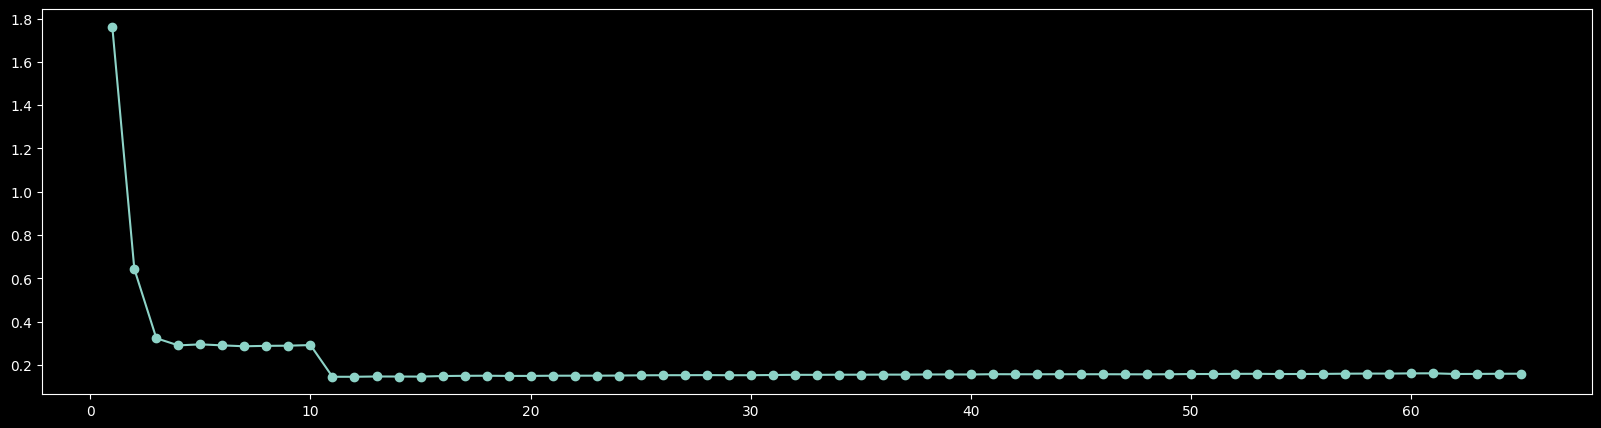

In [46]:

df = df.rename(columns={"R^2": "R2"})
display(df)
display((df[df.MSE == df.MSE.min()]))
display((df[df.R2 == df.R2.max()]))
plt.figure(figsize=(20, 5))
plt.plot(df['Run'], df['MSE'])
#plt.plot(df['Run'], df['R^2']-0.9)
plt.scatter(df['Run'], df['MSE'])
#plt.scatter(df['Run'], df['R^2']-0.9)
plt.show

In [ ]:


# Save metrics as CSV
metrics_df = pd.DataFrame({
    'Mean Squared Error': [mse],
    'R² Score':[r2]
   
})
metrics_path = os.path.join(output_dir, 'metrics.csv')
metrics_df.to_csv(metrics_path, index=False)

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rfr, X_preprocessed, y, cv=5, scoring='r2')
print(f'Cross-validated R² scores: {cv_scores}')
print(f'Mean Cross-validated R² score: {np.mean(cv_scores)}')



# Save cross-validation metrics to CSV
cv_metrics_path = os.path.join(output_dir, 'cv_metrics.csv')
cv_metrics_df.to_csv(cv_metrics_path, index=False)



In [ ]:
# Save cross-validation metrics to CSV
cv_metrics_df = pd.DataFrame({
    'Fold': np.arange(1, 6),
    'R² Score': cv_scores
})
cv_metrics_path = os.path.join(output_dir, 'cv_metrics.csv')
cv_metrics_df.to_csv(cv_metrics_path, index=False)


In [ ]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = rfr.feature_importances_

# Get the names of the selected features
selected_features = pipeline.named_steps['feature_selection'].get_feature_names_out()

# Create a DataFrame for visualization
importances_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances
})

# Sort by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# Save feature importances to CSV
importances_path = os.path.join(output_dir, 'feature_importances.csv')
importances_df.to_csv(importances_path, index=False)

# Save the plot
plot_path = os.path.join(output_dir, 'feature_importances.png')
plt.savefig(plot_path)

In [ ]:
import os
import pandas as pd
import numpy as np
from joblib import dump
import matplotlib.pyplot as plt

# Assuming the output directory, pipeline, and model are already defined and fitted

# Extract the indices of the selected features
selected_feature_indices = pipeline.named_steps['feature_selection'].get_support(indices=True)

# Map the selected feature indices to the original column names
selected_feature_names = [training_columns[i] for i in selected_feature_indices]

# Get feature importances from the fitted model
feature_importances = rfr.feature_importances_

# Create a DataFrame using the original column names and their importances
importances_df = pd.DataFrame({
    'Feature': selected_feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Save feature importances to CSV
importances_path = os.path.join(output_dir, 'feature_importances.csv')
importances_df.to_csv(importances_path, index=False)

# Plot feature importances
plt.figure(figsize=(30, 28))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.yticks(fontsize=15.5)
plt.xticks(fontsize=20)
plt.title('Feature Importances')
plt.gca().invert_yaxis()

# Save the plot
plot_path = os.path.join(output_dir, 'feature_importances.png')
plt.savefig(plot_path)
plt.show()


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import dump

# Assuming the output directory, pipeline, and model are already defined and fitted

# Extract the indices of the selected features
selected_feature_indices = pipeline.named_steps['feature_selection'].get_support(indices=True)

# Map the selected feature indices to the original column names
selected_feature_names = [training_columns[i] for i in selected_feature_indices]

# Get feature importances from the fitted model
feature_importances = rfr.feature_importances_

# Create a DataFrame using the original column names and their importances
importances_df = pd.DataFrame({
    'Feature': selected_feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Normalize feature importances
importances_df['Normalized_Importance'] = importances_df['Importance'] / importances_df['Importance'].sum()

# Assuming correlation_df is already defined and contains the correlation scores with the same features
# Merge the importances_df with correlation_df to align the features
merged_df = importances_df.merge(correlation_df, on='Feature')

# Save feature importances and correlation to CSV
importances_path = os.path.join(output_dir, 'feature_importances_with_correlation.csv')
merged_df.to_csv(importances_path, index=False)

# Plot normalized feature importances
plt.figure(figsize=(30, 28))
plt.barh(merged_df['Feature'], merged_df['Normalized_Importance'], color='blue', alpha=0.6, label='Normalized Importance')
plt.xlabel('Normalized Importance')
plt.ylabel('Feature')
plt.yticks(fontsize=15.5)
plt.title('Normalized Feature Importances')
plt.gca().invert_yaxis()

# Save the normalized feature importances plot
normalized_importances_plot_path = os.path.join(output_dir, 'normalized_feature_importances.png')
plt.savefig(normalized_importances_plot_path)
plt.show()

# Plot correlation scores
plt.figure(figsize=(30, 28))
plt.barh(merged_df['Feature'], merged_df['Correlation'], color='green', alpha=0.6, label='Correlation')
plt.xlabel('Correlation Score')
plt.ylabel('Feature')
plt.yticks(fontsize=15.5)
plt.title('Correlation Scores with Target')
plt.gca().invert_yaxis()

# Save the correlation scores plot
correlation_plot_path = os.path.join(output_dir, 'correlation_scores.png')
plt.savefig(correlation_plot_path)
plt.show()

# Plot normalized feature importances vs correlation scores
plt.figure(figsize=(30, 28))
width = 0.4
plt.barh(merged_df['Feature'], merged_df['Normalized_Importance'], color='blue', alpha=0.6, height=width, label='Normalized Importance')
plt.barh(merged_df['Feature'], merged_df['Correlation'], color='green', alpha=0.6, height=width, label='Correlation', left=merged_df['Normalized_Importance'])
plt.xlabel('Scores')
plt.ylabel('Feature')
plt.yticks(fontsize=15.5)
plt.title('Normalized Feature Importances vs Correlation Scores')
plt.legend()

# Save the combined plot
combined_plot_path = os.path.join(output_dir, 'normalized_importances_vs_correlation.png')
plt.savefig(combined_plot_path)
plt.show()
